## Explore if the disease status convolutes the disease score in either scDRS or scPagwas

In [1]:
library(data.table)
library(ggplot2)
library(cowplot)

Warning message:
“package ‘data.table’ was built under R version 4.4.1”


## RA

### Get results

In [2]:
data_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/amp2/"
meta_data <- readRDS(paste0(data_dir, "meta_qc_amp2RA_exp_norm_2023_06_13.rds"))

output_dir <- "~/Downloads/scpgwas/scdrs/RA/RA_10kb/"
cell_score <- data.frame(fread(paste0(output_dir, "RA.score.gz")))

cell_score_scp <- data.frame(fread("~/Downloads/scpgwas/scdrs/RA/RA_10kb/unweighted/RA_scP.score.gz"))

# read in scpgwas results
scp_scores <- data.frame(fread("~/Downloads/scpgwas//RA_output_micro_subset/micro_white_subset_10.21.24_singlecell_scPagwas_score_pvalue.Result.csv"))

In [3]:
rownames(cell_score) <- cell_score$V1
rownames(cell_score_scp) <- cell_score_scp$V1
rownames(scp_scores) <- scp_scores$V1
meta_data = meta_data[meta_data$cell %in% scp_scores$V1,]
dim(meta_data)
cell_score <- cell_score[meta_data$cell,]
identical(cell_score$V1, meta_data$cell)
cell_score_scp <- cell_score_scp[meta_data$cell,]
identical(cell_score_scp$V1, meta_data$cell)
cell_score_scp <- cell_score_scp[,c("mc_pval", "zscore")]
colnames(cell_score_scp) <- c("mc_pval_scp", "zscore_scp")
scp_scores <- scp_scores[meta_data$cell,]
identical(scp_scores$V1, meta_data$cell)
meta_data <- cbind(meta_data, cell_score[,c("mc_pval", "zscore")])
meta_data <- cbind(meta_data, cell_score_scp)
meta_data <- cbind(meta_data, scp_scores)
any(is.na(cell_score))

[1] 137284     14

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

In [4]:
meta_data[1:2,]

,sample,cell,cluster_number,cluster_name,cell_type,subject_id,percent.mito,nGene,nUMI,redcap_data_access_group,⋯,zscore,mc_pval_scp,zscore_scp,V1,scPagwas.TRS.Score,scPagwas.downTRS.Score,scPagwas.gPAS.score,Random_Correct_BG_p,Random_Correct_BG_adjp,Random_Correct_BG_z
,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BRI-401_AAGACTCCATTATGCG,BRI-401,BRI-401_AAGACTCCATTATGCG,B-1,B-1: CD24++CD27+IgM+ unswitched memory,B cell,300-0302,0.1215055,1986,7333,cedars,⋯,0.2360691,0.000999001,5.776802,BRI-401_AAGACTCCATTATGCG,0.3498651,0.11514944,-4.0838085,0.0003376213,0.0009934413,3.399439
BRI-401_ACACAGTGTAACACGG,BRI-401,BRI-401_ACACAGTGTAACACGG,B-2,B-2: IgM+IgD+TCL1A+ naive,B cell,300-0302,0.1307667,1700,6156,cedars,⋯,0.2944319,0.000999001,5.776802,BRI-401_ACACAGTGTAACACGG,0.3386806,0.09153717,-0.4740373,0.0014521720,0.0036763293,2.977685


[1] "sample"                   "cell"                    
 [3] "cluster_number"           "cluster_name"            
 [5] "cell_type"                "subject_id"              
 [7] "percent.mito"             "nGene"                   
 [9] "nUMI"                     "redcap_data_access_group"
[11] "age"                      "sex"                     
[13] "RA_duration_years"        "Race_white"              
[15] "mc_pval"                  "zscore"                  
[17] "mc_pval_scp"              "zscore_scp"              
[19] "V1"                       "scPagwas.TRS.Score"      
[21] "scPagwas.downTRS.Score"   "scPagwas.gPAS.score"     
[23] "Random_Correct_BG_p"      "Random_Correct_BG_adjp"  
[25] "Random_Correct_BG_z"

0%       25%       50%       75%      100% 
 0.000000  0.539726  4.030137 16.446575 40.931507

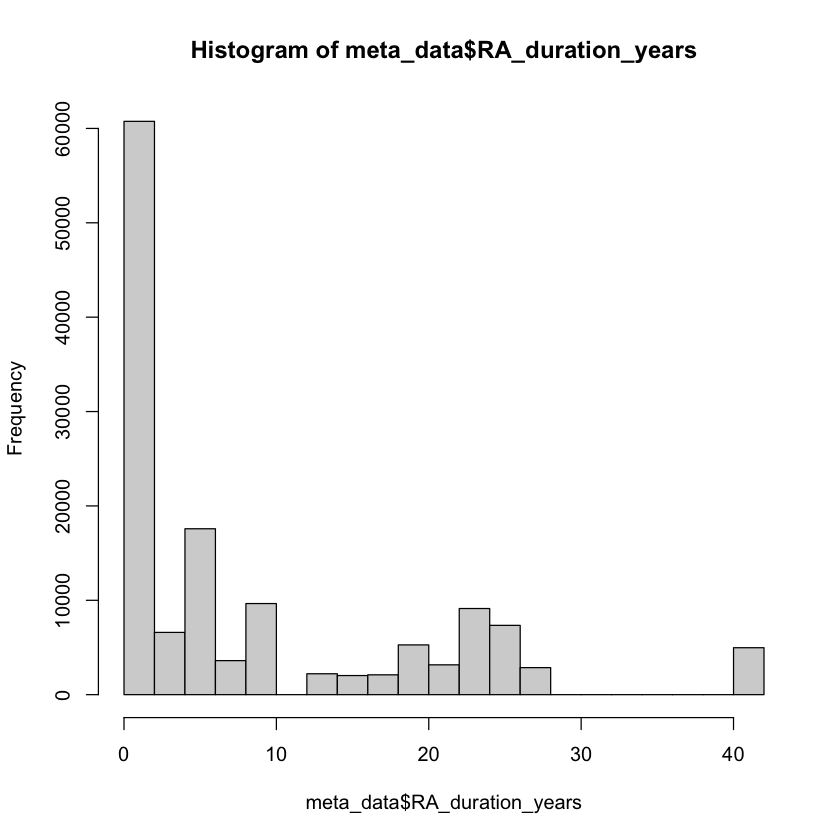

In [5]:
colnames(meta_data)
quantile(meta_data$RA_duration_years)
hist(meta_data$RA_duration_years)

### Do cells from patients with different durations of RA distribute evenly across cell states?

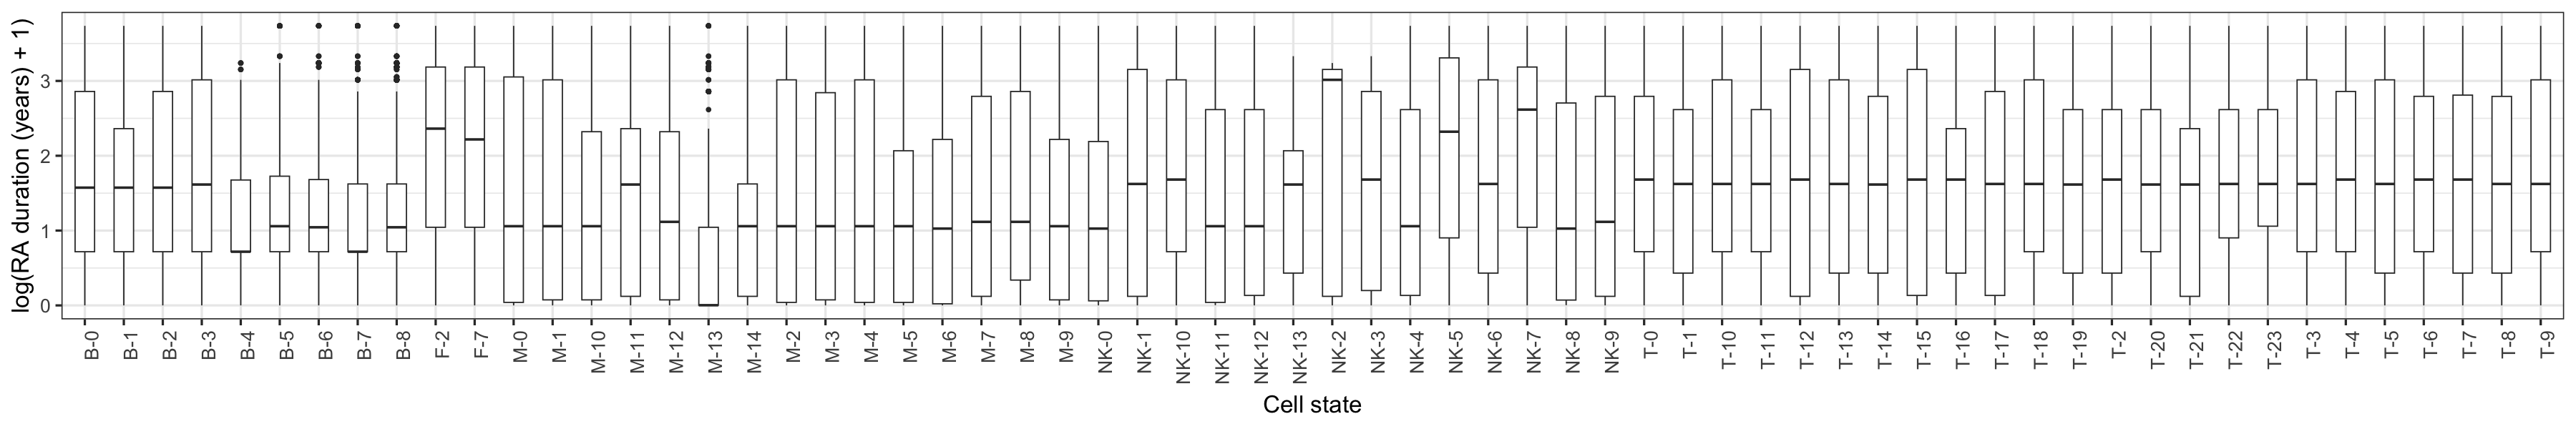

In [6]:
options(repr.plot.height=5, repr.plot.width=30)
ggplot(data=meta_data, aes(x=cluster_number, y=log(RA_duration_years+1))) + #geom_violin() + 
geom_boxplot(width=0.5) + 
theme_bw(base_size=20) + labs(x="Cell state", y="log(RA duration (years) + 1)") + theme(axis.text.x = element_text(angle = 90, hjust = 1))
# significant differences: B-4, F-0, M-13?

In [7]:
# get the RA duration years in blocks
meta_data$RA_duration_block <- "100"
meta_data[meta_data$RA_duration_years == 0,]$RA_duration_block <- "0"
meta_data[meta_data$RA_duration_years != 0 & meta_data$RA_duration_years < 10,]$RA_duration_block <- "0-10"
meta_data[meta_data$RA_duration_years >=10 & meta_data$RA_duration_years < 20,]$RA_duration_block <- "10-20"
meta_data[meta_data$RA_duration_years >= 20 & meta_data$RA_duration_years < 30,]$RA_duration_block <- "20-30"
meta_data[meta_data$RA_duration_years > 30,]$RA_duration_block <- "30+"

table(meta_data$RA_duration_block)


    0  0-10 10-20 20-30   30+ 
 8256 89937 11616 22500  4975 

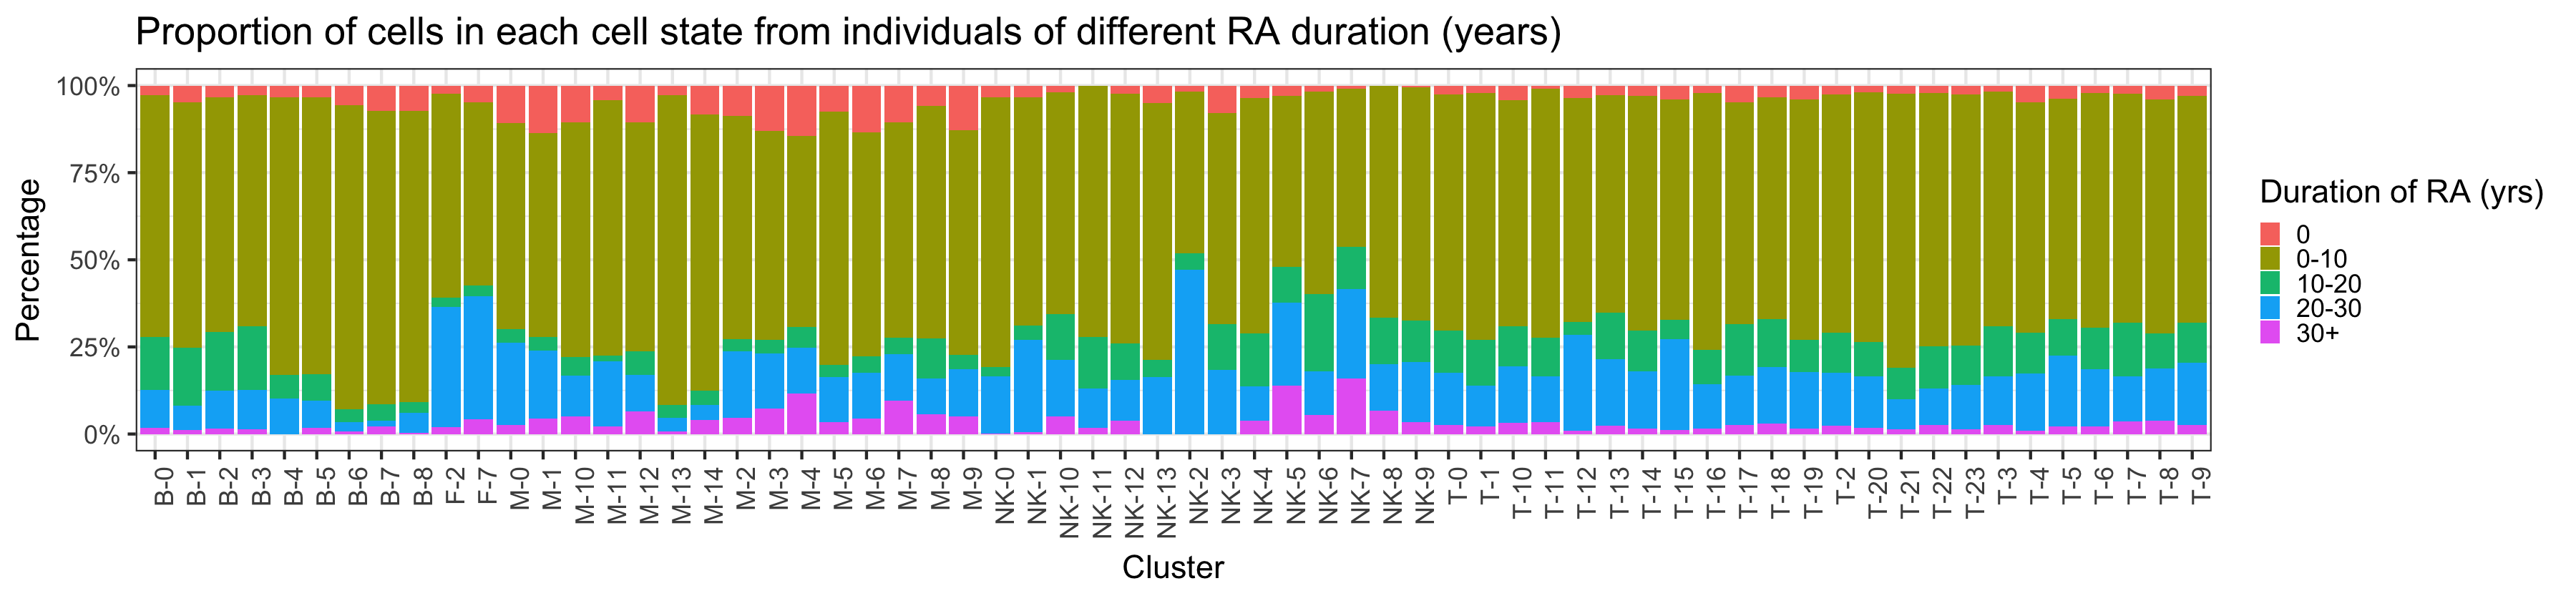

In [8]:
options(repr.plot.height=7, repr.plot.width=30)
ggplot(meta_data, aes(x = cluster_number, fill = RA_duration_block)) + 
  geom_bar(position = "fill") +  # Use 'fill' position to stack bars to 100%
  scale_y_continuous(labels = scales::percent) +  # Convert y-axis to percentages
  labs(title = "Proportion of cells in each cell state from individuals of different RA duration (years)",
       x = "Cluster",
       y = "Percentage", 
      fill = "Duration of RA (yrs)") +
   theme_bw(base_size=27)  + theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave("./RA_durationblock_cellstate.png", dpi=300, height=7, width=30)

### Do cells from patients with different durations of RA have different disease scores?

In [9]:
# scale to be from 0 to 1 so can get accurate comparison of changes
scale_to_01 <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

In [10]:
options(repr.plot.height=5, repr.plot.width=20)
p1 <- ggplot(data=meta_data, aes(x=RA_duration_block, y=zscore)) + geom_violin() + 
geom_boxplot(width=0.3) + theme_bw(base_size=20) + labs(y="scDRS single-cell disease score", x="RA duration (years)")
p2 <- ggplot(data=meta_data, aes(x=RA_duration_block, y=scPagwas.downTRS.Score)) + geom_violin() + 
geom_boxplot(width=0.1) + theme_bw(base_size=20) + labs(y="scPagwas Trait Relevant Score", x="RA duration (years)")
p3 <- ggplot(data=meta_data, aes(x=RA_duration_block, y=zscore_scp)) + geom_violin() + 
geom_boxplot(width=0.1) + theme_bw(base_size=20) + labs(y="scDRS scores \n(scPagwas gene input)", x="RA duration (years)")
png("./RA_durationblock_scDRS_scPagwas.png", width=19, height=5, units="in", res=300)
plot_grid(p1, p2, p3, nrow=1, rel_widths=c(1, 1, 1.1))
dev.off()
#ggsave("./RA_durationblock_scDRScore.png", dpi=300, width=7, height=5)

pdf 
  2

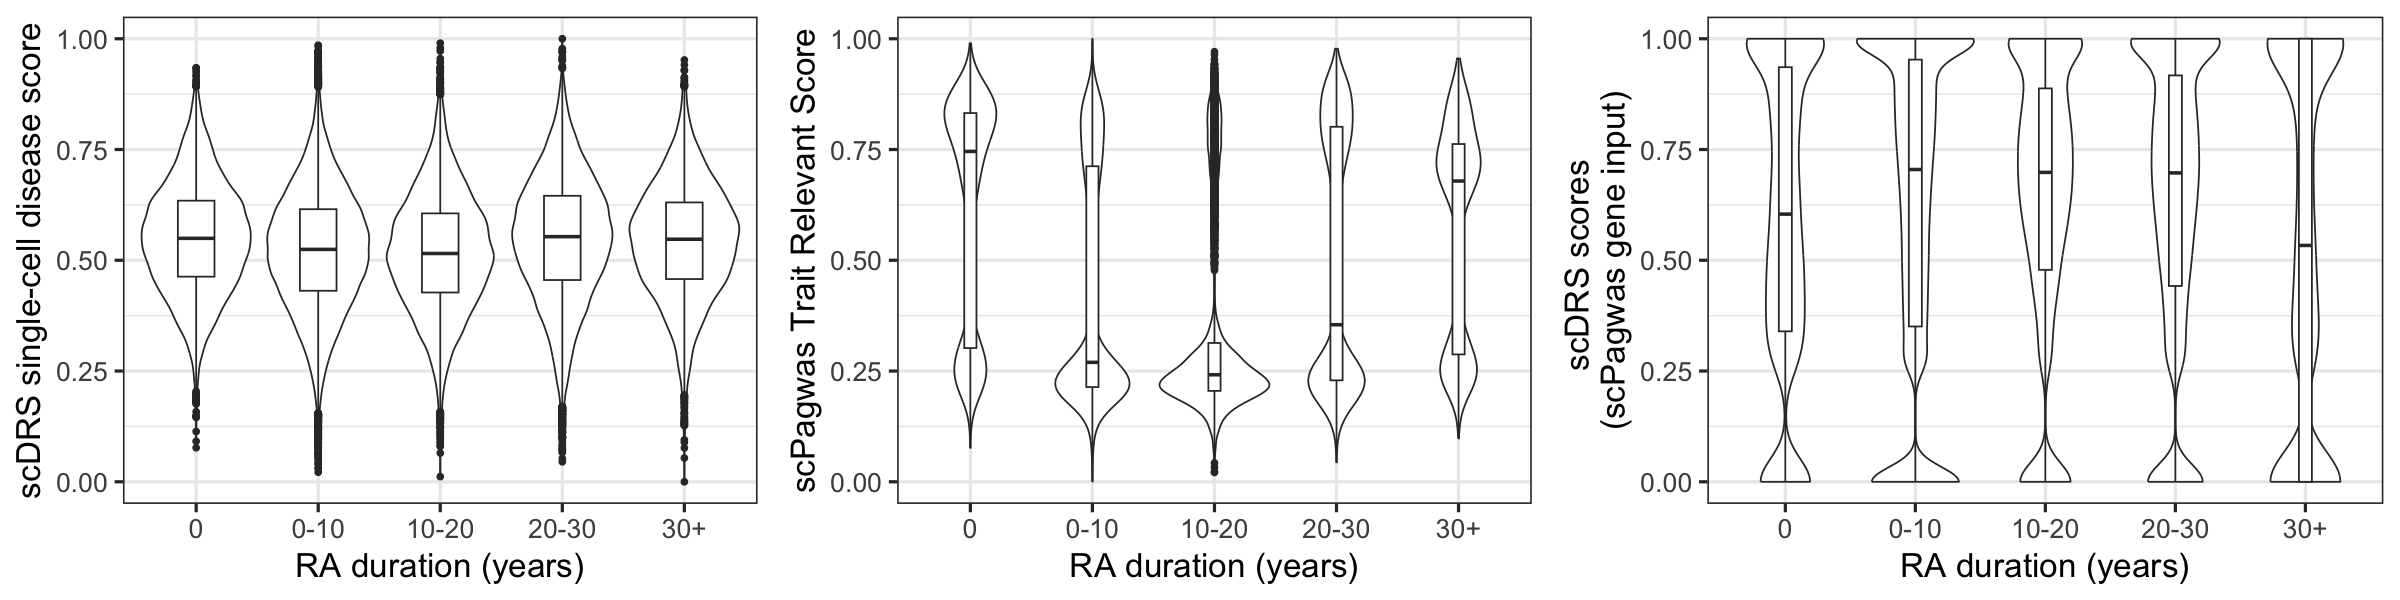

In [11]:
options(repr.plot.height=5, repr.plot.width=20)
p1 <- ggplot(data=meta_data, aes(x=RA_duration_block, y=scale_to_01(zscore))) + geom_violin() + 
geom_boxplot(width=0.3) + theme_bw(base_size=20) + labs(y="scDRS single-cell disease score", x="RA duration (years)")
p2 <- ggplot(data=meta_data, aes(x=RA_duration_block, y=scale_to_01(scPagwas.downTRS.Score))) + geom_violin() + 
geom_boxplot(width=0.1) + theme_bw(base_size=20) + labs(y="scPagwas Trait Relevant Score", x="RA duration (years)")
p3 <- ggplot(data=meta_data, aes(x=RA_duration_block, y=scale_to_01(zscore_scp))) + geom_violin() + 
geom_boxplot(width=0.1) + theme_bw(base_size=20) + labs(y="scDRS scores \n(scPagwas gene input)", x="RA duration (years)")
#png("./RA_durationblock_scDRS_scPagwas
plot_grid(p1, p2, p3, nrow=1, rel_widths=c(1, 1, 1.1))
ggsave("./RA_diseasestatus_scDRScore_scaled.png", dpi=300, width=19, height=5)
#ggsave("./RA_durationblock_scDRScore.png", dpi=300, width=7, height=5)

In [12]:
meta_data$zscore_scaled <- scale_to_01(meta_data$zscore)
meta_data$TRS_scaled <- scale_to_01(meta_data$scPagwas.downTRS.Score)
meta_data$zscore_scp_scaled <- scale_to_01(meta_data$zscore_scp)

[1] "scDRS"


                      Df Sum Sq Mean Sq F value Pr(>F)    
RA_duration_block      4   17.8   4.456   242.7 <2e-16 ***
Residuals         137279 2520.1   0.018                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zscore_scaled ~ RA_duration_block, data = meta_data)

$RA_duration_block
                    diff          lwr           upr     p adj
0-10-0      -0.027783668 -0.032033788 -0.0235335473 0.0000000
10-20-0     -0.033097061 -0.038417196 -0.0277769264 0.0000000
20-30-0     -0.002694454 -0.007450037  0.0020611301 0.5326926
30+-0       -0.007732922 -0.014366227 -0.0010996173 0.0128096
10-20-0-10  -0.005313394 -0.008957272 -0.0016695153 0.0006649
20-30-0-10   0.025089214  0.022334293  0.0278441351 0.0000000
30+-0-10     0.020050746  0.014667926  0.0254335651 0.0000000
20-30-10-20  0.030402608  0.026180061  0.0346251547 0.0000000
30+-10-20    0.025364139  0.019101946  0.0316263320 0.0000000
30+-20-30   -0.005038468 -0.010828702  0.0007517646 0.1225336



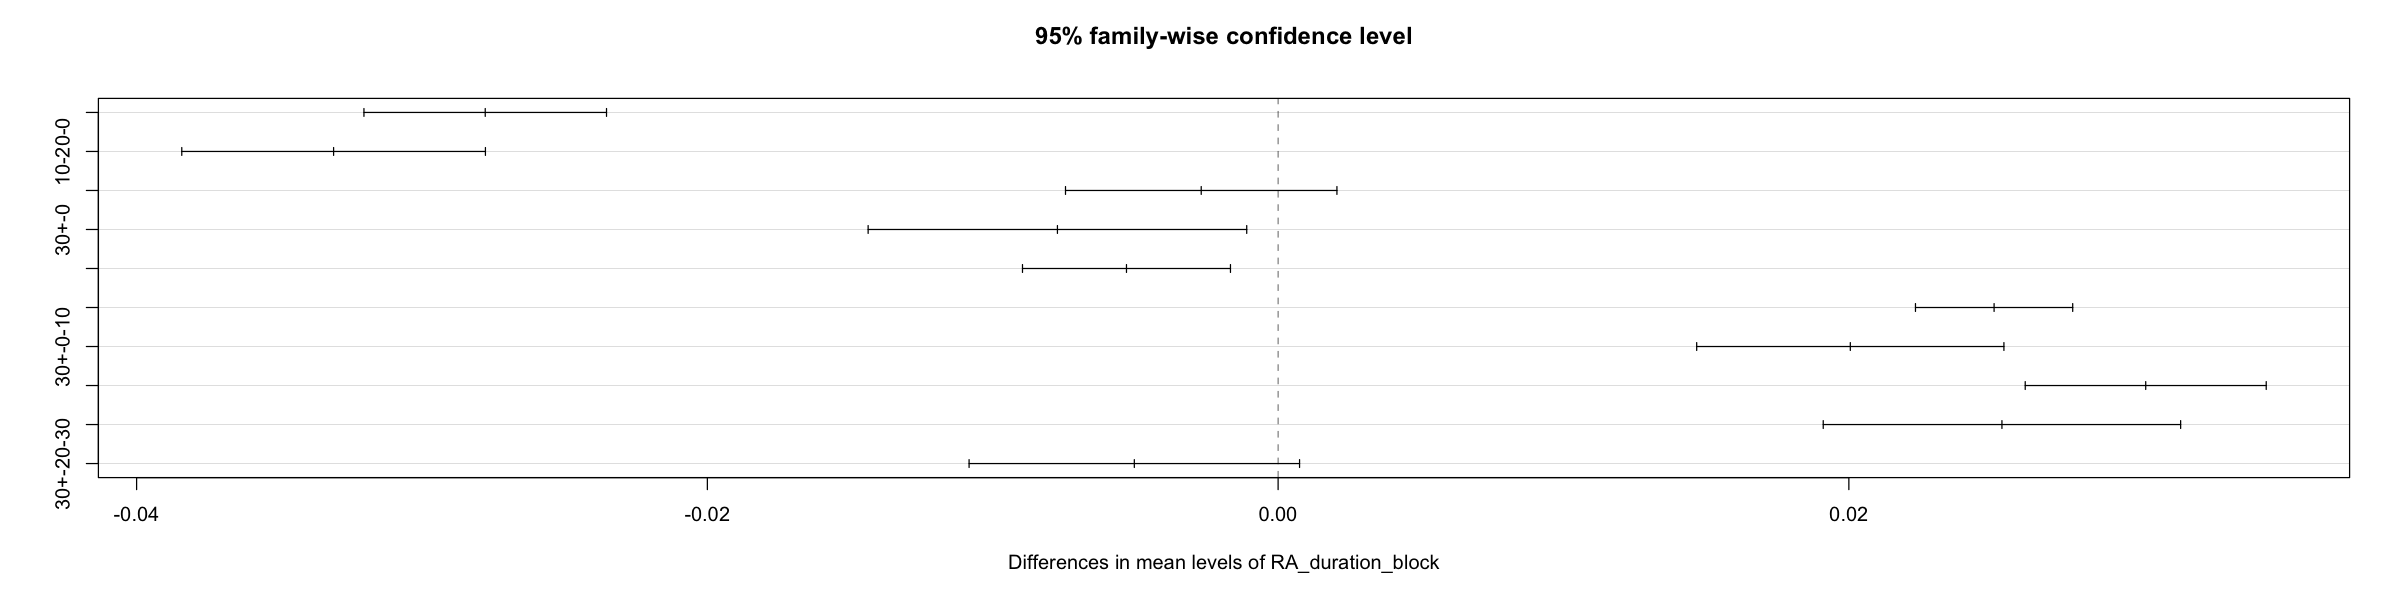

In [13]:
print("scDRS")
anova_model <- aov(zscore_scaled ~ RA_duration_block, data = meta_data)
# View the ANOVA results
summary(anova_model)
# Run the Tukey post-hoc test for pairwise comparisons
tukey_results <- TukeyHSD(anova_model)
# View the Tukey test results
print(tukey_results)
# Optionally, plot the Tukey test results
plot(tukey_results)

[1] "scPagwas"


                      Df Sum Sq Mean Sq F value Pr(>F)    
RA_duration_block      4    600  149.96    2182 <2e-16 ***
Residuals         137279   9436    0.07                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = TRS_scaled ~ RA_duration_block, data = meta_data)

$RA_duration_block
                   diff         lwr         upr p adj
0-10-0      -0.19849833 -0.20672258 -0.19027408     0
10-20-0     -0.28681635 -0.29711115 -0.27652156     0
20-30-0     -0.11728687 -0.12648923 -0.10808452     0
30+-0       -0.05044642 -0.06328228 -0.03761055     0
10-20-0-10  -0.08831802 -0.09536916 -0.08126689     0
20-30-0-10   0.08121146  0.07588051  0.08654241     0
30+-0-10     0.14805191  0.13763582  0.15846801     0
20-30-10-20  0.16952948  0.16135859  0.17770038     0
30+-10-20    0.23636994  0.22425220  0.24848767     0
30+-20-30    0.06684045  0.05563598  0.07804492     0



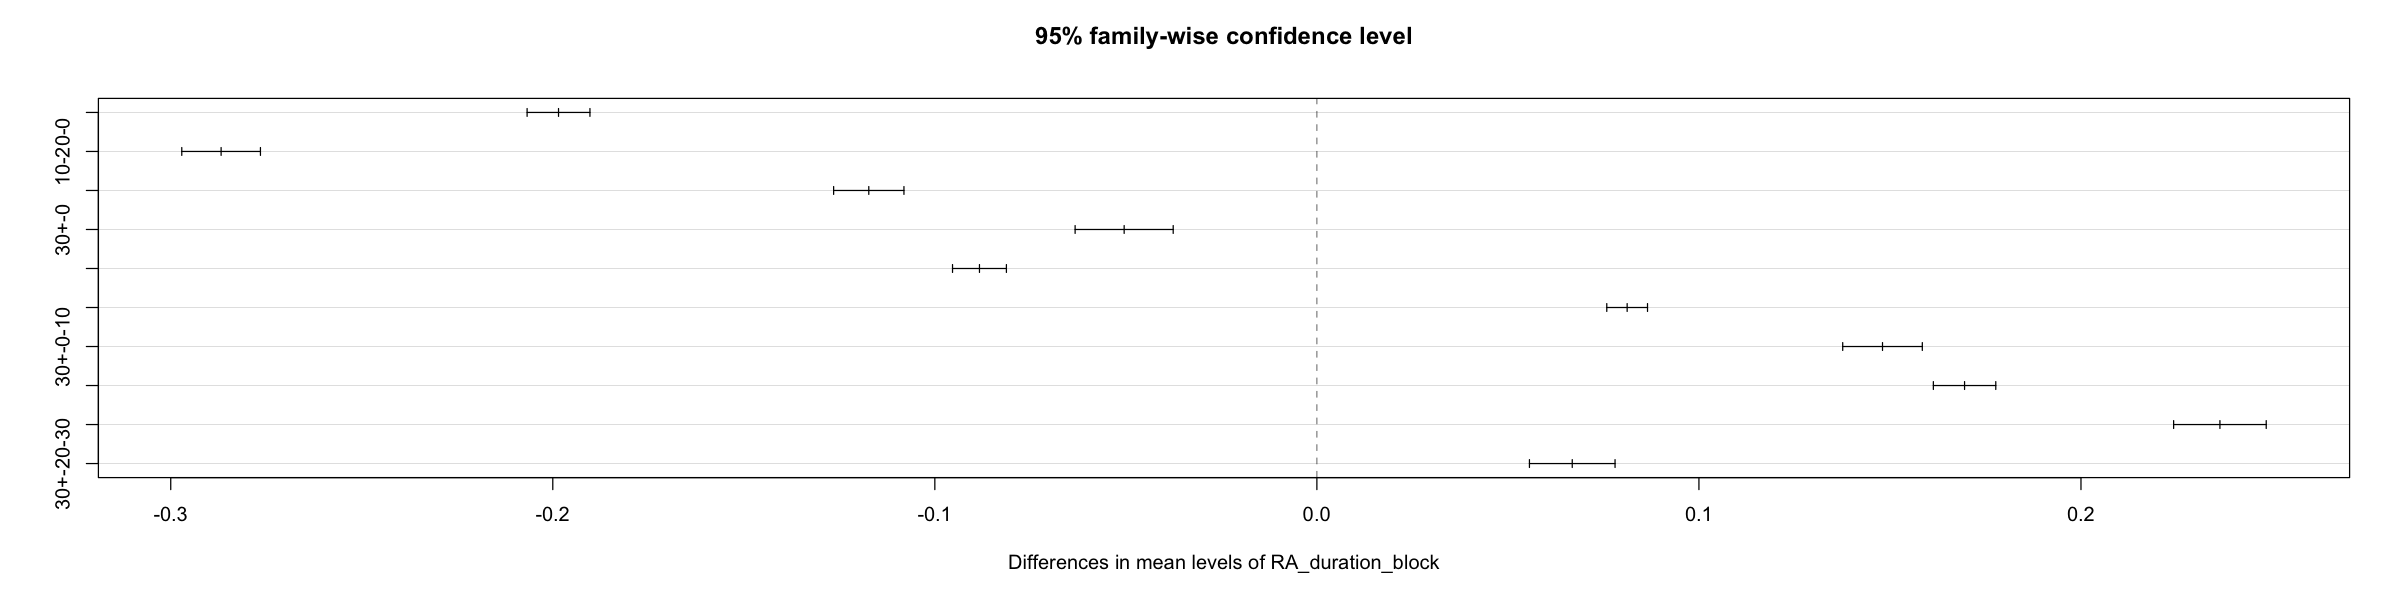

In [14]:
print("scPagwas")
anova_model <- aov(TRS_scaled ~ RA_duration_block, data = meta_data)
# View the ANOVA results
summary(anova_model)
# Run the Tukey post-hoc test for pairwise comparisons
tukey_results_p <- TukeyHSD(anova_model)
# View the Tukey test results
print(tukey_results_p)
# Optionally, plot the Tukey test results
plot(tukey_results_p)

[1] "scDRS with scPagwas genes input"


                      Df Sum Sq Mean Sq F value Pr(>F)    
RA_duration_block      4     59  14.655   117.8 <2e-16 ***
Residuals         137279  17081   0.124                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zscore_scaled ~ RA_duration_block, data = meta_data)

$RA_duration_block
                    diff          lwr           upr     p adj
0-10-0      -0.027783668 -0.032033788 -0.0235335473 0.0000000
10-20-0     -0.033097061 -0.038417196 -0.0277769264 0.0000000
20-30-0     -0.002694454 -0.007450037  0.0020611301 0.5326926
30+-0       -0.007732922 -0.014366227 -0.0010996173 0.0128096
10-20-0-10  -0.005313394 -0.008957272 -0.0016695153 0.0006649
20-30-0-10   0.025089214  0.022334293  0.0278441351 0.0000000
30+-0-10     0.020050746  0.014667926  0.0254335651 0.0000000
20-30-10-20  0.030402608  0.026180061  0.0346251547 0.0000000
30+-10-20    0.025364139  0.019101946  0.0316263320 0.0000000
30+-20-30   -0.005038468 -0.010828702  0.0007517646 0.1225336



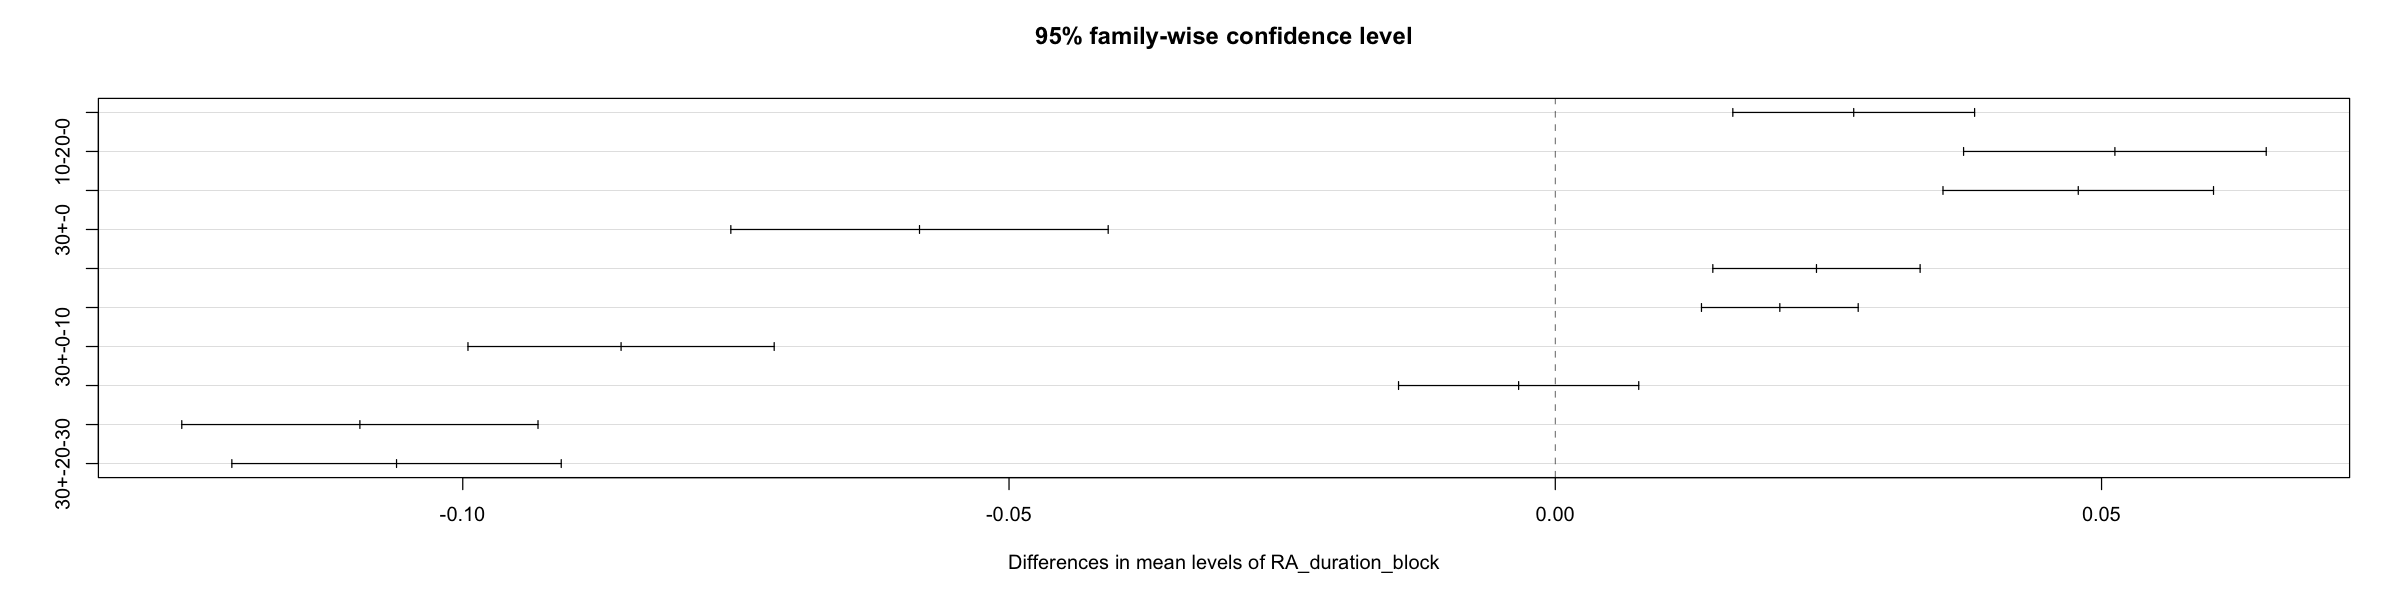

In [15]:
print("scDRS with scPagwas genes input")
anova_model <- aov(zscore_scp_scaled ~ RA_duration_block, data = meta_data)
# View the ANOVA results
summary(anova_model)
# Run the Tukey post-hoc test for pairwise comparisons
tukey_results_scp <- TukeyHSD(anova_model)
# View the Tukey test results
print(tukey_results)
# Optionally, plot the Tukey test results
plot(tukey_results_scp)

In [16]:
tukey_results <- as.data.frame(tukey_results$RA_duration_block)
tukey_results$group <- rownames(tukey_results)
tukey_results$Method <- "scDRS"
tukey_results[1:2,]

tukey_results_p <- as.data.frame(tukey_results_p$RA_duration_block)
tukey_results_p$group <- rownames(tukey_results_p)
tukey_results_p$Method <- "scPagwas"
tukey_results_p[1:2,]

tukey_results_scp <- as.data.frame(tukey_results_scp$RA_duration_block)
tukey_results_scp$group <- rownames(tukey_results_scp)
tukey_results_scp$Method <- "scDRS, scPagwas input"
tukey_results_scp[1:2,]

tukey_results_ra <- rbind(tukey_results, tukey_results_p)
tukey_results_ra <- rbind(tukey_results_ra, tukey_results_scp)

,diff,lwr,upr,p adj,group,Method
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0-10-0,-0.02778367,-0.03203379,-0.02353355,0,0-10-0,scDRS
10-20-0,-0.03309706,-0.03841720,-0.02777693,0,10-20-0,scDRS


,diff,lwr,upr,p adj,group,Method
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0-10-0,-0.1984983,-0.2067226,-0.1902741,0,0-10-0,scPagwas
10-20-0,-0.2868164,-0.2971112,-0.2765216,0,10-20-0,scPagwas


,diff,lwr,upr,p adj,group,Method
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0-10-0,0.02731518,0.01625039,0.03837998,1.651316e-10,0-10-0,"scDRS, scPagwas input"
10-20-0,0.05122167,0.03737119,0.06507215,5.317968e-14,10-20-0,"scDRS, scPagwas input"


In [17]:
unique(tukey_results_ra$group)
tukey_results_ra$graph_group <- ""
tukey_results_ra[tukey_results_ra$group == "0-10-0",]$graph_group <- "0-10 vs\n0"
tukey_results_ra[tukey_results_ra$group == "10-20-0",]$graph_group <- "10-20 vs\n0"
tukey_results_ra[tukey_results_ra$group == "20-30-0",]$graph_group <- "20-30 vs\n0"
tukey_results_ra[tukey_results_ra$group == "30+-0",]$graph_group <- "30+ vs\n0"
tukey_results_ra[tukey_results_ra$group == "10-20-0-10",]$graph_group <- "10-20 vs\n0-10"
tukey_results_ra[tukey_results_ra$group == "20-30-0-10",]$graph_group <- "20-30 vs\n0-10"
tukey_results_ra[tukey_results_ra$group == "30+-0-10",]$graph_group <- "30+ vs\n0-10"
tukey_results_ra[tukey_results_ra$group == "20-30-10-20",]$graph_group <- "20-30 vs\n10-20"
tukey_results_ra[tukey_results_ra$group == "30+-10-20",]$graph_group <- "30+ vs\n10-20"
tukey_results_ra[tukey_results_ra$group == "30+-20-30",]$graph_group <- "30+ vs\n20-30"

[1] "0-10-0"      "10-20-0"     "20-30-0"     "30+-0"       "10-20-0-10" 
 [6] "20-30-0-10"  "30+-0-10"    "20-30-10-20" "30+-10-20"   "30+-20-30"

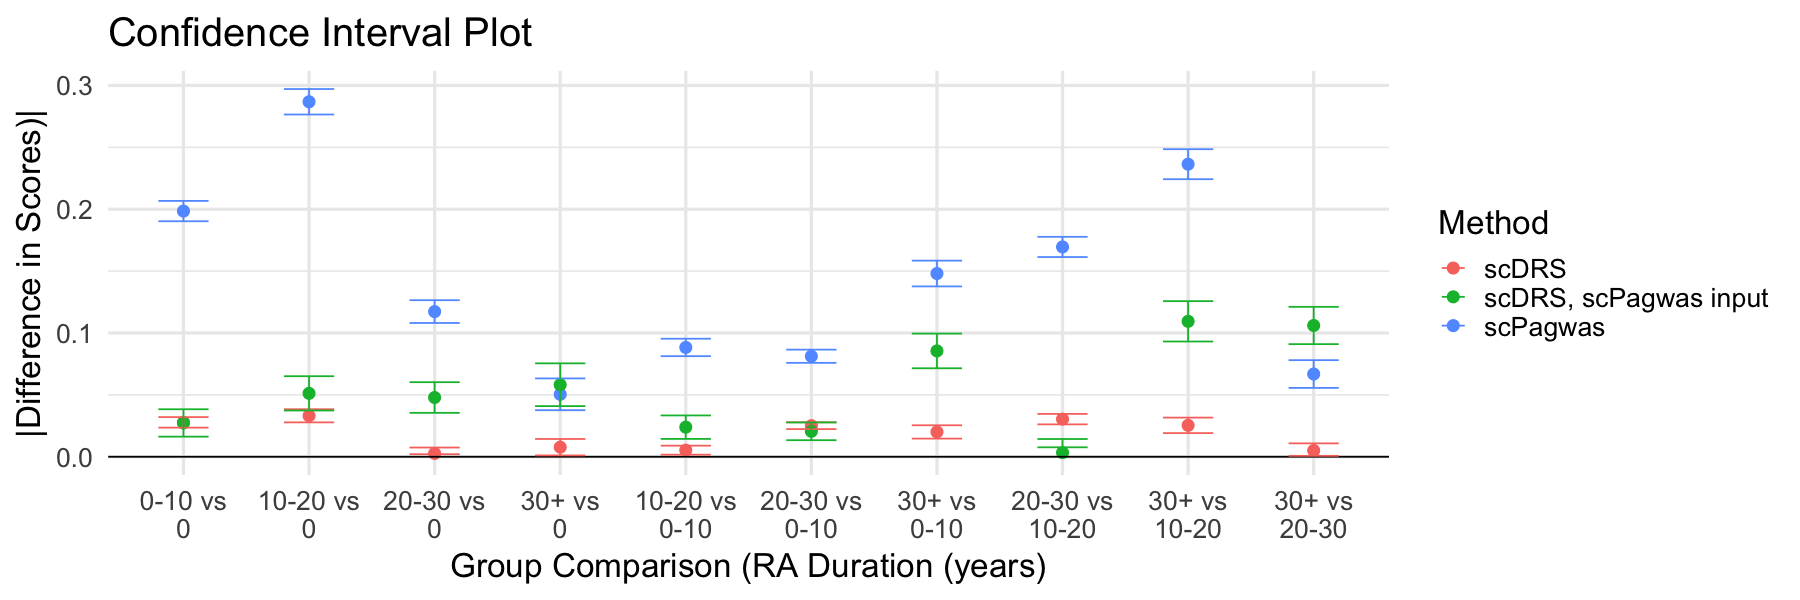

In [18]:
# Plot the differences 
options(repr.plot.width=15)
graph_levels = c("0-10 vs\n0", "10-20 vs\n0", "20-30 vs\n0", "30+ vs\n0", 
  "10-20 vs\n0-10", "20-30 vs\n0-10", "30+ vs\n0-10", 
  "20-30 vs\n10-20", "30+ vs\n10-20", "30+ vs\n20-30")
ggplot(tukey_results_ra, aes(x = factor(graph_group, levels=graph_levels), y = abs(diff), color=Method)) +
  geom_point(size = 3) +   geom_hline(yintercept=0) +                      # Plot points for diff
  geom_errorbar(aes(ymin = abs(lwr), ymax = abs(upr)), width = 0.4) +  # Confidence interval
  labs(x = "Group Comparison (RA Duration (years)", y = "|Difference in Scores)|", title = "Confidence Interval Plot") +
  theme_minimal(base_size=20)

## UC

In [19]:
meta_data <- readRDS("/Users/hopekirby/Desktop/SC_GWAS_Bench/data/SC_data/Simile_UC/meta_qc_ulcerative_colitis_gut.rds")
output_dir <- "/Users/hopekirby/Downloads/scpgwas/scdrs/10kb/"
cell_score <- data.frame(fread(paste0(output_dir, "UC.score.gz")))
#cell_score <- data.frame(fread("/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/UC_53/UC2017.score.gz"))
cell_score_scp <- data.frame(fread("~/Downloads/scpgwas/scdrs/10kb/unweighted/UC_scP.score.gz"))
# read in scpgwas results
uc_scp_scores <- data.frame(fread("~/Downloads/scpgwas//UC_output_micro/UCmicro_white_10.22.24_singlecell_scPagwas_score_pvalue.Result.csv"))

In [20]:
uc_scp_scores[1:2,]
cell_score[1:2,]

,V1,scPagwas.TRS.Score,scPagwas.downTRS.Score,scPagwas.gPAS.score,Random_Correct_BG_p,Random_Correct_BG_adjp,Random_Correct_BG_z
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N7.EpiA.AACAAACTTCTCCG,0.5261737,0.001545668,-0.10266378,0.5691095,1,-0.1741075
2,N7.EpiA.AACTCGGACGTAAC,0.4891180,0.076802926,0.09480646,0.7594897,1,-0.7046620


,V1,raw_score,norm_score,mc_pval,pval,nlog10_pval,zscore
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N7.EpiA.AACAAACTTCTCCG,0.05380449,2.0589046,0.02897103,0.02517748,1.5989877,1.9569362
2,N7.EpiA.AACTCGGACGTAAC,0.05052997,0.4285009,0.33766234,0.32274870,0.4911355,0.4600263


In [21]:
rownames(cell_score) <- cell_score$V1
rownames(cell_score_scp) <- cell_score_scp$V1
rownames(uc_scp_scores) <- uc_scp_scores$V1
meta_data = meta_data[meta_data$cell %in% uc_scp_scores$V1,]
dim(meta_data)
cell_score <- cell_score[meta_data$cell,]
identical(cell_score$V1, meta_data$cell)
cell_score_scp <- cell_score_scp[meta_data$cell,]
identical(cell_score_scp$V1, meta_data$cell)
cell_score_scp <- cell_score_scp[,c("mc_pval", "zscore")]
colnames(cell_score_scp) <- c("mc_pval_scp", "zscore_scp")
uc_scp_scores <- uc_scp_scores[meta_data$cell,]
identical(uc_scp_scores$V1, meta_data$cell)
meta_data <- cbind(meta_data, cell_score[,c("mc_pval", "zscore")])
meta_data <- cbind(meta_data, cell_score_scp)
meta_data <- cbind(meta_data, uc_scp_scores)

any(is.na(cell_score))

[1] 198389      8

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

In [22]:
colnames(meta_data)
meta_data[1:2,]

[1] "cell"                   "sample"                 "disease"               
 [4] "cell_type"              "cluster"                "nGene"                 
 [7] "nUMI"                   "percent_mito"           "mc_pval"               
[10] "zscore"                 "mc_pval_scp"            "zscore_scp"            
[13] "V1"                     "scPagwas.TRS.Score"     "scPagwas.downTRS.Score"
[16] "scPagwas.gPAS.score"    "Random_Correct_BG_p"    "Random_Correct_BG_adjp"
[19] "Random_Correct_BG_z"

,cell,sample,disease,cell_type,cluster,nGene,nUMI,percent_mito,mc_pval,zscore,mc_pval_scp,zscore_scp,V1,scPagwas.TRS.Score,scPagwas.downTRS.Score,scPagwas.gPAS.score,Random_Correct_BG_p,Random_Correct_BG_adjp,Random_Correct_BG_z
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N7.EpiA.AACAAACTTCTCCG,N7.EpiA.AACAAACTTCTCCG,N7,Non-inflamed,Epi,Immature Goblet,637,2625,0.17104762,0.02897103,1.9569362,0.8971029,-1.2495180,N7.EpiA.AACAAACTTCTCCG,0.5261737,0.001545668,-0.10266378,0.5691095,1,-0.1741075
N7.EpiA.AACTCGGACGTAAC,N7.EpiA.AACTCGGACGTAAC,N7,Non-inflamed,Epi,Enterocyte Progenitors,586,2004,0.00499002,0.33766234,0.4600263,0.1718282,0.9391654,N7.EpiA.AACTCGGACGTAAC,0.4891180,0.076802926,0.09480646,0.7594897,1,-0.7046620


In [23]:
table(meta_data$disease)


     Healthy     Inflamed Non-inflamed 
       56201        69492        72696 

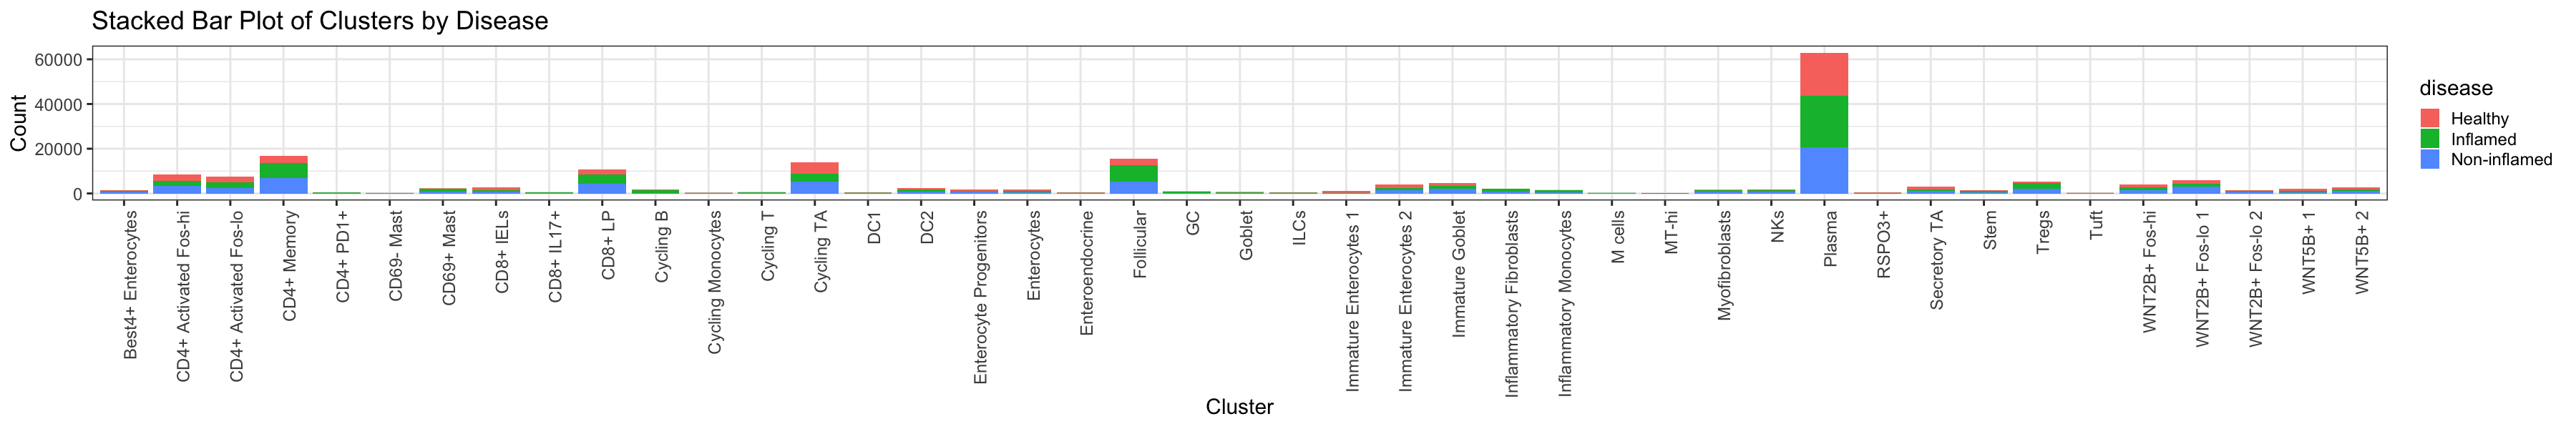

In [24]:
options(repr.plot.height=5, repr.plot.width=30)
ggplot(meta_data, aes(x = cluster, fill = disease)) +  # 'fill' maps the 'disease' to different colors
  geom_bar(position = "stack") +                # Creates stacked bars
  labs(title = "Stacked Bar Plot of Clusters by Disease",
       x = "Cluster",
       y = "Count") +
  theme_bw(base_size=18)  + theme(axis.text.x = element_text(angle = 90, hjust = 1))

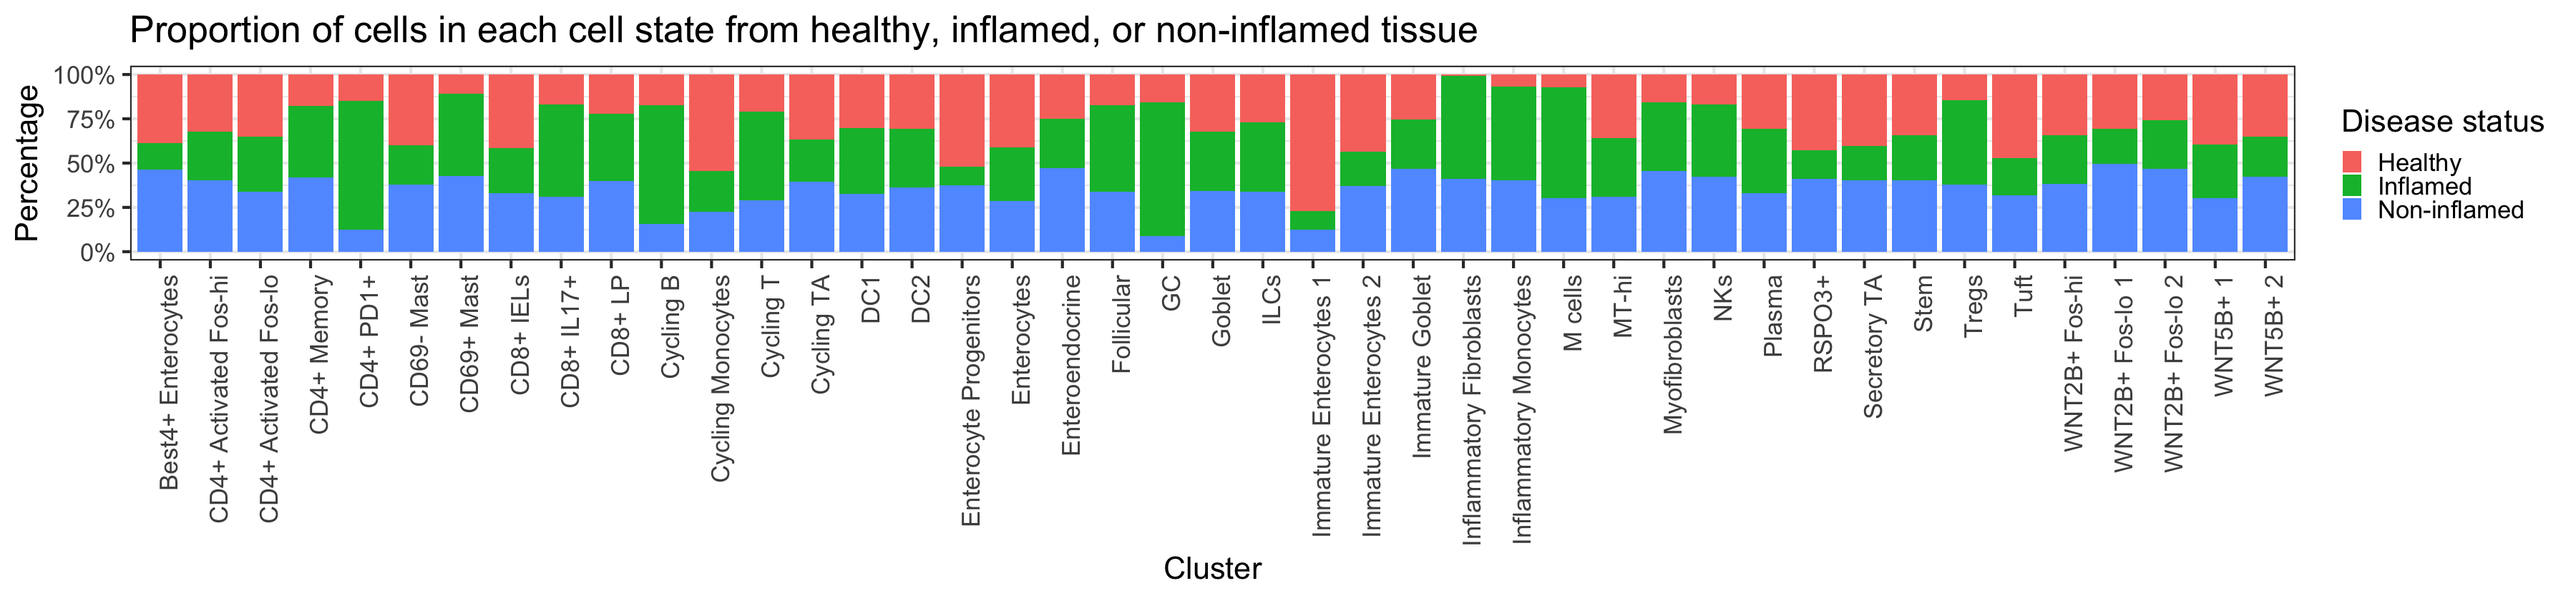

In [25]:
options(repr.plot.height=7, repr.plot.width=30)
ggplot(meta_data, aes(x = cluster, fill = disease)) + 
  geom_bar(position = "fill") +  # Use 'fill' position to stack bars to 100%
  scale_y_continuous(labels = scales::percent) +  # Convert y-axis to percentages
  labs(title = "Proportion of cells in each cell state from healthy, inflamed, or non-inflamed tissue",
       x = "Cluster",
       y = "Percentage", 
      fill="Disease status") +
   theme_bw(base_size=26)  + theme(axis.text.x = element_text(angle = 90, hjust = 1))
#ggsave("./UC_diseasestatus_cellstate.png", dpi=300, width=30, height=7)

In [26]:
colnames(meta_data)
library(cowplot)

[1] "cell"                   "sample"                 "disease"               
 [4] "cell_type"              "cluster"                "nGene"                 
 [7] "nUMI"                   "percent_mito"           "mc_pval"               
[10] "zscore"                 "mc_pval_scp"            "zscore_scp"            
[13] "V1"                     "scPagwas.TRS.Score"     "scPagwas.downTRS.Score"
[16] "scPagwas.gPAS.score"    "Random_Correct_BG_p"    "Random_Correct_BG_adjp"
[19] "Random_Correct_BG_z"

In [27]:
# scale the z scores
scale(c(-1, 3, -4))
scale(c(-10, 30, -40))

-0.0949158
1.0440738
-0.9491580


-0.0949158
1.0440738
-0.9491580


In [28]:
options(repr.plot.height=5, repr.plot.width=18)
p1 <- ggplot(data=meta_data, aes(x=disease, y=zscore)) + geom_violin() + 
geom_boxplot(width=0.3) + theme_bw(base_size=23) + labs(y="scDRS cell disease scores", x="Disease status")
p2 <- ggplot(data=meta_data, aes(x=disease, y=scPagwas.downTRS.Score)) + geom_violin() + 
geom_boxplot(width=0.2) + theme_bw(base_size=23) + labs(y="scPagwas TRS scores", x="Disease status")
p3 <- ggplot(data=meta_data, aes(x=disease, y=zscore_scp)) + geom_violin() + 
geom_boxplot(width=0.2) + theme_bw(base_size=23) + labs(y="scDRS scores \n(scPagwas gene input)", x="Disease status")
png("./UC_diseasestatus_scDRS_scPagwas.png", width=19, height=5, units="in", res=300)
plot_grid(p1, p2, p3, nrow=1, rel_widths=c(1, 1, 1.1))
dev.off()

pdf 
  2

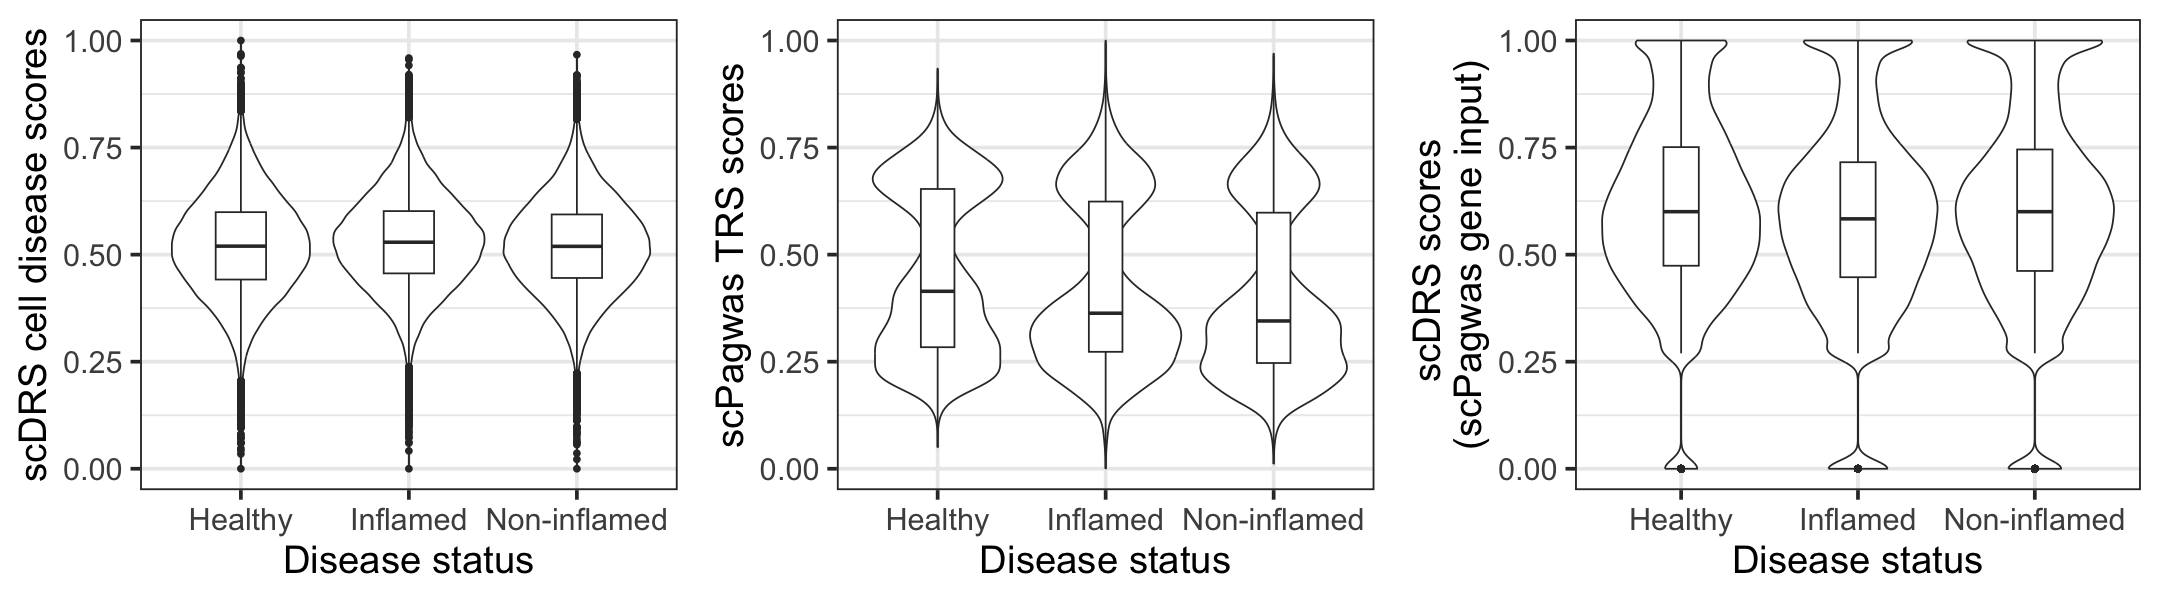

In [29]:



options(repr.plot.height=5, repr.plot.width=18)
p1 <- ggplot(data=meta_data, aes(x=disease, y=scale_to_01(zscore))) + geom_violin() + 
geom_boxplot(width=0.3) + theme_bw(base_size=23) + labs(y="scDRS cell disease scores", x="Disease status")
p2 <- ggplot(data=meta_data, aes(x=disease, y=scale_to_01(scPagwas.downTRS.Score))) + geom_violin() + 
geom_boxplot(width=0.2) + theme_bw(base_size=23) + labs(y="scPagwas TRS scores", x="Disease status")
p3 <- ggplot(data=meta_data, aes(x=disease, y=scale_to_01(zscore_scp))) + geom_violin() + 
geom_boxplot(width=0.2) + theme_bw(base_size=23) + labs(y="scDRS scores \n(scPagwas gene input)", x="Disease status")
plot_grid(p1, p2, p3, nrow=1, rel_widths=c(1, 1, 1.1))
ggsave("./UC_diseasestatus_scDRScore_scaled.png", dpi=300, width=19, height=5)

In [30]:
meta_data$zscore_scaled <- scale_to_01(meta_data$zscore)
meta_data$TRS_scaled <- scale_to_01(meta_data$scPagwas.downTRS.Score)
meta_data$zscore_scp_scaled <- scale_to_01(meta_data$zscore_scp)

[1] "SCDRS DISEASE SCORE"


                Df Sum Sq Mean Sq F value Pr(>F)    
disease          2      4  2.0105   163.7 <2e-16 ***
Residuals   198386   2437  0.0123                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zscore_scaled ~ disease, data = meta_data)

$disease
                               diff          lwr           upr     p adj
Inflamed-Healthy       0.0089124135  0.007438766  0.0103860608 0.0000000
Non-inflamed-Healthy  -0.0008793369 -0.002338392  0.0005797178 0.3343882
Non-inflamed-Inflamed -0.0097917504 -0.011169868 -0.0084136328 0.0000000



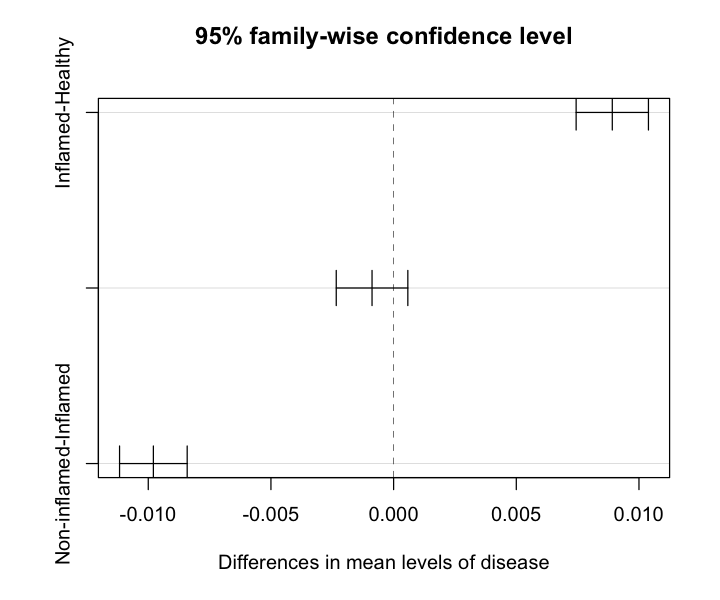

In [31]:
options(repr.plot.width=6)
print("SCDRS DISEASE SCORE")
anova_model <- aov(zscore_scaled ~ disease, data = meta_data)
# View the ANOVA results
summary(anova_model)
# Run the Tukey post-hoc test for pairwise comparisons
tukey_results <- TukeyHSD(anova_model)
# View the Tukey test results
print(tukey_results)
# Optionally, plot the Tukey test results
plot(tukey_results)

[1] "SCGWAS TRS SCORE"


                Df Sum Sq Mean Sq F value Pr(>F)    
disease          2     93   46.46    1262 <2e-16 ***
Residuals   198386   7302    0.04                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = TRS_scaled ~ disease, data = meta_data)

$disease
                             diff         lwr         upr p adj
Inflamed-Healthy      -0.02994594 -0.03249673 -0.02739515     0
Non-inflamed-Healthy  -0.05414112 -0.05666665 -0.05161559     0
Non-inflamed-Inflamed -0.02419518 -0.02658061 -0.02180974     0



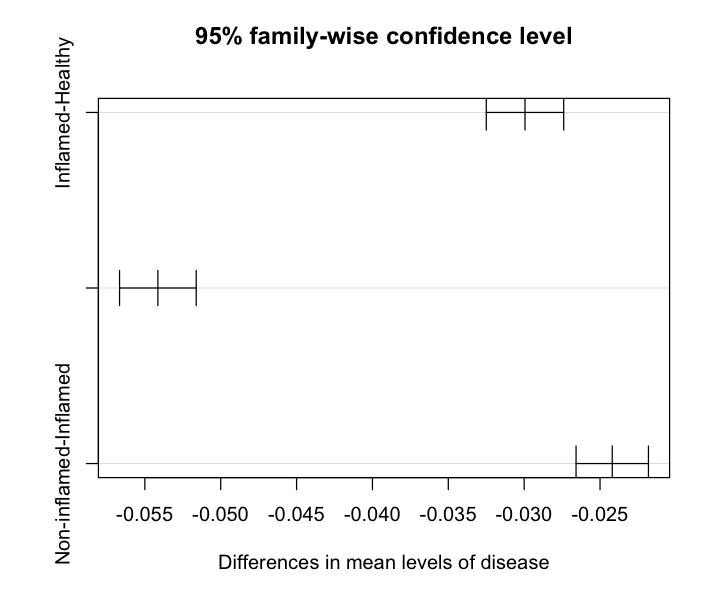

In [32]:
print("SCGWAS TRS SCORE")
anova_model <- aov(TRS_scaled ~ disease, data = meta_data)
# View the ANOVA results
summary(anova_model)
# Run the Tukey post-hoc test for pairwise comparisons
tukey_results_p <- TukeyHSD(anova_model)
# View the Tukey test results
print(tukey_results_p)
# Optionally, plot the Tukey test results
plot(tukey_results_p)

[1] "SCDRS DISEASE SCORE with SCpagwas genes"


                Df Sum Sq Mean Sq F value Pr(>F)    
disease          2     26  13.119   270.7 <2e-16 ***
Residuals   198386   9613   0.048                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zscore_scp_scaled ~ disease, data = meta_data)

$disease
                             diff          lwr          upr p adj
Inflamed-Healthy      -0.02709963 -0.030026406 -0.024172855 0e+00
Non-inflamed-Healthy  -0.00636623 -0.009264024 -0.003468436 8e-07
Non-inflamed-Inflamed  0.02073340  0.017996354  0.023470447 0e+00



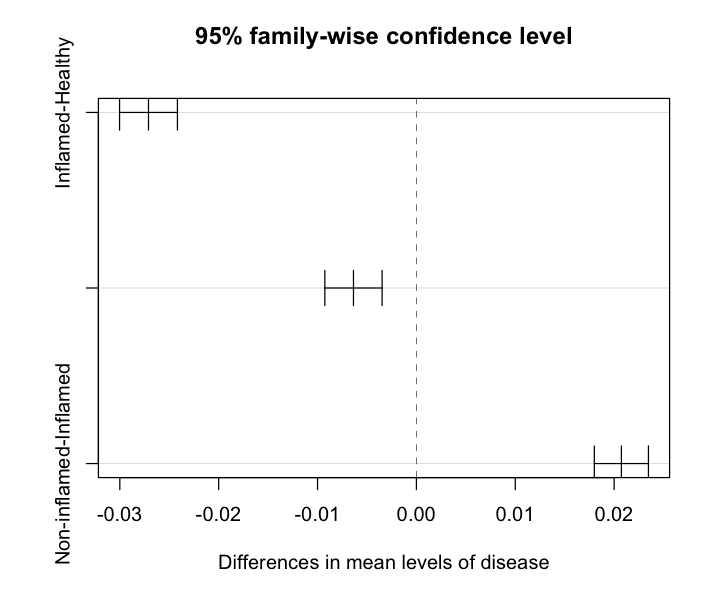

In [33]:
options(repr.plot.width=6)
print("SCDRS DISEASE SCORE with SCpagwas genes")
anova_model <- aov(zscore_scp_scaled ~ disease, data = meta_data)
# View the ANOVA results
summary(anova_model)
# Run the Tukey post-hoc test for pairwise comparisons
tukey_results_scp <- TukeyHSD(anova_model)
# View the Tukey test results
print(tukey_results_scp)
# Optionally, plot the Tukey test results
plot(tukey_results_scp)

In [34]:
tukey_results <- as.data.frame(tukey_results$disease)
tukey_results$group <- rownames(tukey_results)
tukey_results$Method <- "scDRS"
tukey_results[1:2,]

tukey_results_p <- as.data.frame(tukey_results_p$disease)
tukey_results_p$group <- rownames(tukey_results_p)
tukey_results_p$Method <- "scPagwas"
tukey_results_p[1:2,]

tukey_results_scp <- as.data.frame(tukey_results_scp$disease)
tukey_results_scp$group <- rownames(tukey_results_scp)
tukey_results_scp$Method <- "scDRS, scPagwas input"
tukey_results_scp[1:2,]

tukey_results_uc <- rbind(tukey_results, tukey_results_p)
tukey_results_uc <- rbind(tukey_results_uc, tukey_results_scp)

,diff,lwr,upr,p adj,group,Method
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Inflamed-Healthy,0.0089124135,0.007438766,0.0103860608,0.0000000,Inflamed-Healthy,scDRS
Non-inflamed-Healthy,-0.0008793369,-0.002338392,0.0005797178,0.3343882,Non-inflamed-Healthy,scDRS


,diff,lwr,upr,p adj,group,Method
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Inflamed-Healthy,-0.02994594,-0.03249673,-0.02739515,0,Inflamed-Healthy,scPagwas
Non-inflamed-Healthy,-0.05414112,-0.05666665,-0.05161559,0,Non-inflamed-Healthy,scPagwas


,diff,lwr,upr,p adj,group,Method
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Inflamed-Healthy,-0.02709963,-0.030026406,-0.024172855,0.000000e+00,Inflamed-Healthy,"scDRS, scPagwas input"
Non-inflamed-Healthy,-0.00636623,-0.009264024,-0.003468436,7.842134e-07,Non-inflamed-Healthy,"scDRS, scPagwas input"


In [35]:
unique(tukey_results_uc$group)
tukey_results_uc[tukey_results_uc$group == "Inflamed-Healthy",]$group <- "Inflamed -\nHealthy"
tukey_results_uc[tukey_results_uc$group == "Non-inflamed-Healthy",]$group <- "Noninflamed -\nHealthy"
tukey_results_uc[tukey_results_uc$group == "Non-inflamed-Inflamed",]$group <- "Noninflamed -\nInflamed"

[1] "Inflamed-Healthy"      "Non-inflamed-Healthy"  "Non-inflamed-Inflamed"

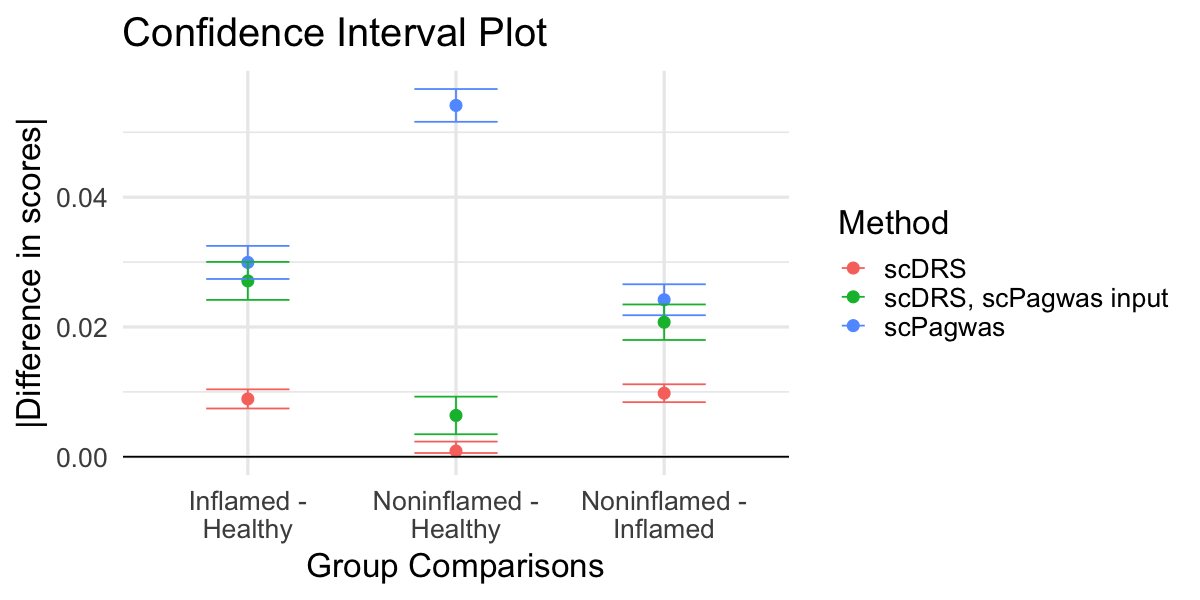

In [36]:
# Plot the differences 
options(repr.plot.width=10)


colors = c("scDRS"="#66c2a4", "scPagwas"="#b2e2e2", "scDRS, scPagwas input"="seagreen4")
ggplot(tukey_results_uc, aes(x = group, y = abs(diff), color=Method)) +
  geom_point(size = 3) +   geom_hline(yintercept=0) +                      # Plot points for diff
  geom_errorbar(aes(ymin = abs(lwr), ymax = abs(upr)), width = 0.4) +  # Confidence interval
  labs(x = "Group Comparisons", y = "|Difference in scores|", title = "Confidence Interval Plot") +
  theme_minimal(base_size=20)

pdf 
  2

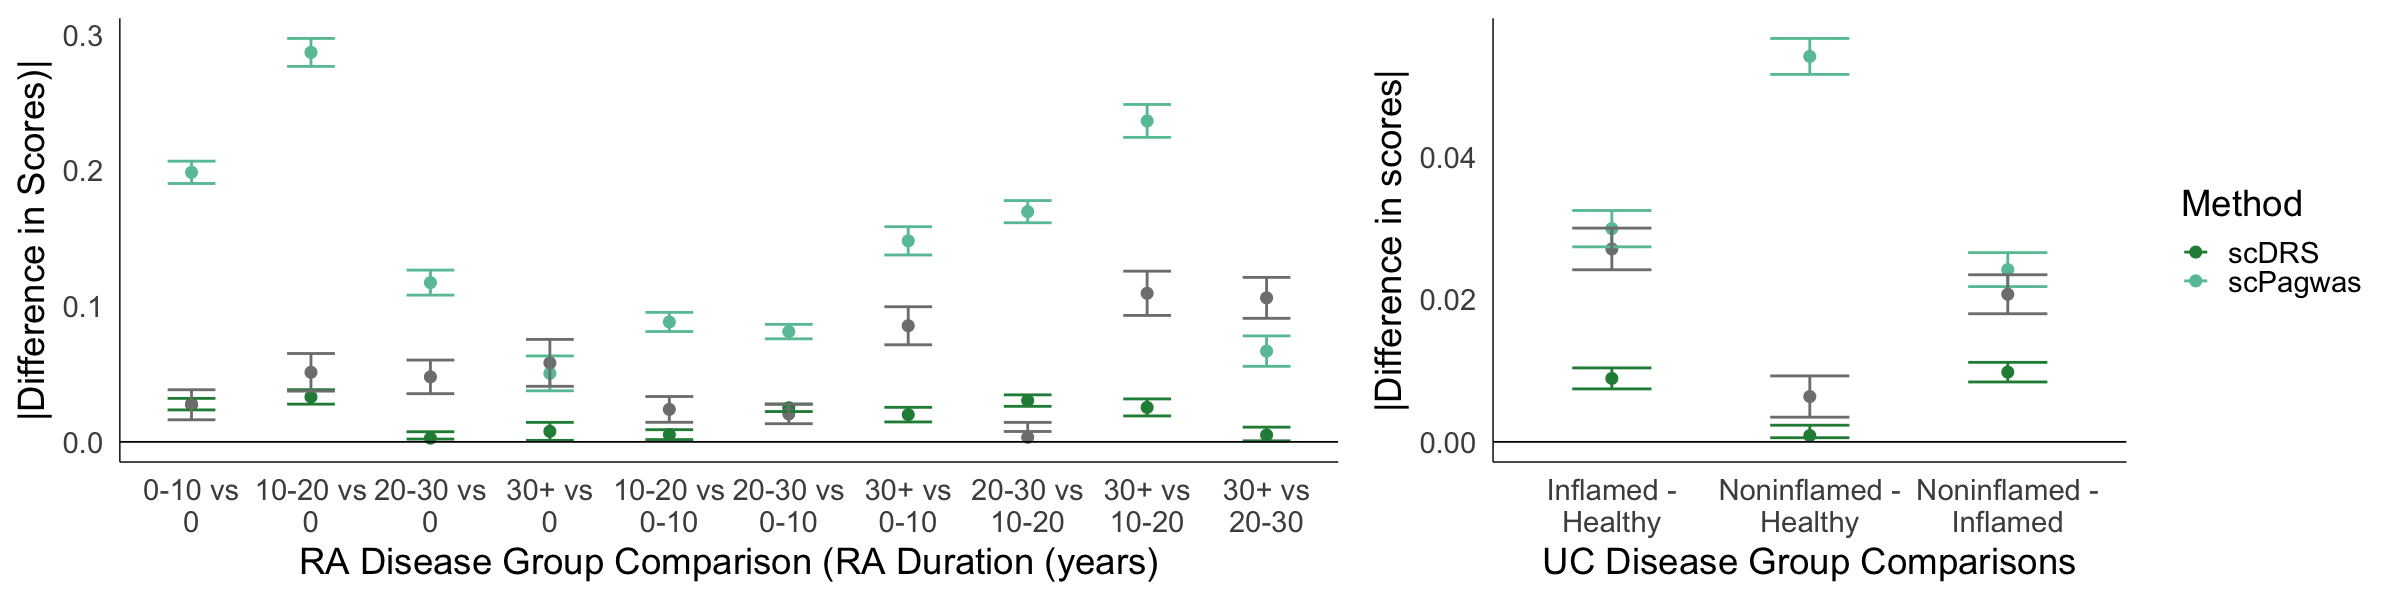

In [37]:
#tukey_results_uc[tukey_results_uc$Method == "scDRS, scPagwas input",]$Method <- "scDRS,\nscPagwas input"
#tukey_results_ra[tukey_results_ra$Method == "scDRS, scPagwas input",]$Method <- "scDRS,\nscPagwas input"
colors = c("scDRS"="#238b45", "scPagwas"="#66c2a4", "scDRS,\nscPagwas input"="#c51b8a")


p1 <- ggplot(tukey_results_ra, aes(x = factor(graph_group, levels=graph_levels), y = abs(diff), color=Method)) +
   geom_point(size = 3) +     
#geom_errorbar(aes(ymin = abs(lwr), ymax = abs(upr)), width = 0.4, linewidth=1, color="black") + # Plot points for diff
  geom_errorbar(aes(ymin = abs(lwr), ymax = abs(upr)), width = 0.4, linewidth=0.8) +  # Confidence interval
  labs(x = "RA Disease Group Comparison (RA Duration (years)", y = "|Difference in Scores)|") +
  theme_minimal(base_size=22) + theme(legend.position="none", panel.grid.major = element_blank() , 
                                      panel.grid.minor = element_blank(), 
                                     panel.border = element_blank(),      # Remove all panel borders
    axis.line = element_line(linewidth=0.4)) + scale_color_manual(values=colors) + geom_hline(yintercept=0)
p2 <- ggplot(tukey_results_uc, aes(x = group, y = abs(diff), color=Method)) +
  geom_point(size = 3) +                       # Plot points for diff
  geom_errorbar(aes(ymin = abs(lwr), ymax = abs(upr)), width = 0.4, linewidth=0.8) +  # Confidence interval
  labs(x = "UC Disease Group Comparisons", y = "|Difference in scores|") +
  theme_minimal(base_size=22) + scale_color_manual(values=colors) + theme(
    panel.grid.major = element_blank(),  # Remove major grid lines
    panel.grid.minor = element_blank(), 
      panel.border = element_blank(),      # Remove all panel borders
    axis.line = element_line(linewidth=0.4)# Remove minor grid lines
  ) + geom_hline(yintercept=0)

options(repr.plot.width=20, repr.plot.height=5)
png("./Group_comparison_RA_UC.png", width=20, height=5, units="in", res=300)
plot_grid(p1, p2, nrow=1, rel_widths=c(1.3,1))
dev.off()
plot_grid(p1, p2, nrow=1, rel_widths=c(1.3,1))